# Import Libaries

In [1]:
import pandas as pd
import numpy as np
#import pycaret as pc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.cluster import DBSCAN
from sklearn import metrics
import json


In [2]:
#set Pandas Dataframe Display Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Import Dataset

In [3]:
# there are many NA values so we are dropping those while loading dataset
leaf1=pd.read_csv(r"..\Dissertation\Data\leaf1bgpclear_apptraffic_2hourRun.csv"\
              ).dropna().drop('Unnamed: 0', axis=1)

# Data Exploration & Data Preprocessing

In [4]:
leaf1

,time,0/RP0/CPU0discard-packets,0/RP0/CPU0encapsulation-failure-packets,0/RP0/CPU0fragmenation-consumed-packets,0/RP0/CPU0fragmenation-failure-packets,0/RP0/CPU0gre-error-drop,0/RP0/CPU0gre-lookup-failed-drop,0/RP0/CPU0incomplete-adjacency-packets,0/RP0/CPU0lisp-decap-error-drops,0/RP0/CPU0lisp-encap-error-drops,0/RP0/CPU0lisp-punt-drops,0/RP0/CPU0mpls-disabled-interface,0/RP0/CPU0multi-label-drops,0/RP0/CPU0no-route-packets,0/RP0/CPU0null-packets,0/RP0/CPU0punt-unreachable-packets,0/RP0/CPU0rp-destination-drop-packets,0/RP0/CPU0rpf-check-failure-packets,0/RP0/CPU0total-number-of-drop-packets,0/RP0/CPU0unresolved-prefix-packets,0/RP0/CPU0unsupported-feature-packets,HundredGigE0/0/0/0bandwidth,HundredGigE0/0/0/0input-data-rate,HundredGigE0/0/0/0input-load,HundredGigE0/0/0/0input-packet-rate,HundredGigE0/0/0/0load-interval,HundredGigE0/0/0/0output-data-rate,HundredGigE0/0/0/0output-load,HundredGigE0/0/0/0output-packet-rate,HundredGigE0/0/0/0peak-input-data-rate,HundredGigE0/0/0/0peak-input-packet-rate,HundredGigE0/0/0/0peak-output-data-rate,HundredGigE0/0/0/0peak-output-packet-rate,HundredGigE0/0/0/1bandwidth,HundredGigE0/0/0/1input-data-rate,HundredGigE0/0/0/1input-load,HundredGigE0/0/0/1input-packet-rate,HundredGigE0/0/0/1load-interval,HundredGigE0/0/0/1output-data-rate,HundredGigE0/0/0/1output-load,HundredGigE0/0/0/1output-packet-rate,HundredGigE0/0/0/1peak-input-data-rate,HundredGigE0/0/0/1peak-input-packet-rate,HundredGigE0/0/0/1peak-output-data-rate,HundredGigE0/0/0/1peak-output-packet-rate,HundredGigE0/0/0/10bandwidth,HundredGigE0/0/0/10input-data-rate,HundredGigE0/0/0/10input-load,HundredGigE0/0/0/10input-packet-rate,HundredGigE0/0/0/10load-interval,HundredGigE0/0/0/10output-data-rate,HundredGigE0/0/0/10output-load,HundredGigE0/0/0/10output-packet-rate,HundredGigE0/0/0/10peak-input-data-rate,HundredGigE0/0/0/10peak-input-packet-rate,HundredGigE0/0/0/10peak-output-data-rate,HundredGigE0/0/0/10peak-output-packet-rate,HundredGigE0/0/0/11bandwidth,HundredGigE0/0/0/11input-data-rate,HundredGigE0/0/0/11input-load,HundredGigE0/0/0/11input-packet-rate,HundredGigE0/0/0/11load-interval,HundredGigE0/0/0/11output-data-rate,HundredGigE0/0/0/11output-load,HundredGigE0/0/0/11output-packet-rate,HundredGigE0/0/0/11peak-input-data-rate,HundredGigE0/0/0/11peak-input-packet-rate,HundredGigE0/0/0/11peak-output-data-rate,HundredGigE0/0/0/11peak-output-packet-rate,HundredGigE0/0/0/12bandwidth,HundredGigE0/0/0/12input-data-rate,HundredGigE0/0/0/12input-load,HundredGigE0/0/0/12input-packet-rate,HundredGigE0/0/0/12load-interval,HundredGigE0/0/0/12output-data-rate,HundredGigE0/0/0/12output-load,HundredGigE0/0/0/12output-packet-rate,HundredGigE0/0/0/12peak-input-data-rate,HundredGigE0/0/0/12peak-input-packet-rate,HundredGigE0/0/0/12peak-output-data-rate,HundredGigE0/0/0/12peak-output-packet-rate,HundredGigE0/0/0/13bandwidth,HundredGigE0/0/0/13input-data-rate,HundredGigE0/0/0/13input-load,HundredGigE0/0/0/13input-packet-rate,HundredGigE0/0/0/13load-interval,HundredGigE0/0/0/13output-data-rate,HundredGigE0/0/0/13output-load,HundredGigE0/0/0/13output-packet-rate,HundredGigE0/0/0/13peak-input-data-rate,HundredGigE0/0/0/13peak-input-packet-rate,HundredGigE0/0/0/13peak-output-data-rate,HundredGigE0/0/0/13peak-output-packet-rate,HundredGigE0/0/0/14bandwidth,HundredGigE0/0/0/14input-data-rate,HundredGigE0/0/0/14input-load,HundredGigE0/0/0/14input-packet-rate,HundredGigE0/0/0/14load-interval,HundredGigE0/0/0/14output-data-rate,HundredGigE0/0/0/14output-load,HundredGigE0/0/0/14output-packet-rate,HundredGigE0/0/0/14peak-input-data-rate,HundredGigE0/0/0/14peak-input-packet-rate,HundredGigE0/0/0/14peak-output-data-rate,HundredGigE0/0/0/14peak-output-packet-rate,HundredGigE0/0/0/15bandwidth,HundredGigE0/0/0/15input-data-rate,HundredGigE0/0/0/15input-load,HundredGigE0/0/0/15input-packet-rate,HundredGigE0/0/0/15load-interval,HundredGigE0/0/0/15output-data-rate,HundredGigE0/0/0/15output-load,HundredGigE0/0/0/15output-packet-rate,HundredGigE0/0/0/15peak-input-data-r

In [5]:
leaf1.describe(include='all')

,time,0/RP0/CPU0discard-packets,0/RP0/CPU0encapsulation-failure-packets,0/RP0/CPU0fragmenation-consumed-packets,0/RP0/CPU0fragmenation-failure-packets,0/RP0/CPU0gre-error-drop,0/RP0/CPU0gre-lookup-failed-drop,0/RP0/CPU0incomplete-adjacency-packets,0/RP0/CPU0lisp-decap-error-drops,0/RP0/CPU0lisp-encap-error-drops,0/RP0/CPU0lisp-punt-drops,0/RP0/CPU0mpls-disabled-interface,0/RP0/CPU0multi-label-drops,0/RP0/CPU0no-route-packets,0/RP0/CPU0null-packets,0/RP0/CPU0punt-unreachable-packets,0/RP0/CPU0rp-destination-drop-packets,0/RP0/CPU0rpf-check-failure-packets,0/RP0/CPU0total-number-of-drop-packets,0/RP0/CPU0unresolved-prefix-packets,0/RP0/CPU0unsupported-feature-packets,HundredGigE0/0/0/0bandwidth,HundredGigE0/0/0/0input-data-rate,HundredGigE0/0/0/0input-load,HundredGigE0/0/0/0input-packet-rate,HundredGigE0/0/0/0load-interval,HundredGigE0/0/0/0output-data-rate,HundredGigE0/0/0/0output-load,HundredGigE0/0/0/0output-packet-rate,HundredGigE0/0/0/0peak-input-data-rate,HundredGigE0/0/0/0peak-input-packet-rate,HundredGigE0/0/0/0peak-output-data-rate,HundredGigE0/0/0/0peak-output-packet-rate,HundredGigE0/0/0/1bandwidth,HundredGigE0/0/0/1input-data-rate,HundredGigE0/0/0/1input-load,HundredGigE0/0/0/1input-packet-rate,HundredGigE0/0/0/1load-interval,HundredGigE0/0/0/1output-data-rate,HundredGigE0/0/0/1output-load,HundredGigE0/0/0/1output-packet-rate,HundredGigE0/0/0/1peak-input-data-rate,HundredGigE0/0/0/1peak-input-packet-rate,HundredGigE0/0/0/1peak-output-data-rate,HundredGigE0/0/0/1peak-output-packet-rate,HundredGigE0/0/0/10bandwidth,HundredGigE0/0/0/10input-data-rate,HundredGigE0/0/0/10input-load,HundredGigE0/0/0/10input-packet-rate,HundredGigE0/0/0/10load-interval,HundredGigE0/0/0/10output-data-rate,HundredGigE0/0/0/10output-load,HundredGigE0/0/0/10output-packet-rate,HundredGigE0/0/0/10peak-input-data-rate,HundredGigE0/0/0/10peak-input-packet-rate,HundredGigE0/0/0/10peak-output-data-rate,HundredGigE0/0/0/10peak-output-packet-rate,HundredGigE0/0/0/11bandwidth,HundredGigE0/0/0/11input-data-rate,HundredGigE0/0/0/11input-load,HundredGigE0/0/0/11input-packet-rate,HundredGigE0/0/0/11load-interval,HundredGigE0/0/0/11output-data-rate,HundredGigE0/0/0/11output-load,HundredGigE0/0/0/11output-packet-rate,HundredGigE0/0/0/11peak-input-data-rate,HundredGigE0/0/0/11peak-input-packet-rate,HundredGigE0/0/0/11peak-output-data-rate,HundredGigE0/0/0/11peak-output-packet-rate,HundredGigE0/0/0/12bandwidth,HundredGigE0/0/0/12input-data-rate,HundredGigE0/0/0/12input-load,HundredGigE0/0/0/12input-packet-rate,HundredGigE0/0/0/12load-interval,HundredGigE0/0/0/12output-data-rate,HundredGigE0/0/0/12output-load,HundredGigE0/0/0/12output-packet-rate,HundredGigE0/0/0/12peak-input-data-rate,HundredGigE0/0/0/12peak-input-packet-rate,HundredGigE0/0/0/12peak-output-data-rate,HundredGigE0/0/0/12peak-output-packet-rate,HundredGigE0/0/0/13bandwidth,HundredGigE0/0/0/13input-data-rate,HundredGigE0/0/0/13input-load,HundredGigE0/0/0/13input-packet-rate,HundredGigE0/0/0/13load-interval,HundredGigE0/0/0/13output-data-rate,HundredGigE0/0/0/13output-load,HundredGigE0/0/0/13output-packet-rate,HundredGigE0/0/0/13peak-input-data-rate,HundredGigE0/0/0/13peak-input-packet-rate,HundredGigE0/0/0/13peak-output-data-rate,HundredGigE0/0/0/13peak-output-packet-rate,HundredGigE0/0/0/14bandwidth,HundredGigE0/0/0/14input-data-rate,HundredGigE0/0/0/14input-load,HundredGigE0/0/0/14input-packet-rate,HundredGigE0/0/0/14load-interval,HundredGigE0/0/0/14output-data-rate,HundredGigE0/0/0/14output-load,HundredGigE0/0/0/14output-packet-rate,HundredGigE0/0/0/14peak-input-data-rate,HundredGigE0/0/0/14peak-input-packet-rate,HundredGigE0/0/0/14peak-output-data-rate,HundredGigE0/0/0/14peak-output-packet-rate,HundredGigE0/0/0/15bandwidth,HundredGigE0/0/0/15input-data-rate,HundredGigE0/0/0/15input-load,HundredGigE0/0/0/15input-packet-rate,HundredGigE0/0/0/15load-interval,HundredGigE0/0/0/15output-data-rate,HundredGigE0/0/0/15output-load,HundredGigE0/0/0/15output-packet-rate,HundredGigE0/0/0/15peak-input-data-r

In [6]:
#check percentage there are any NA valuesif any 
leaf1.isna().sum()/len(leaf1)*100

time                                                    0.0
0/RP0/CPU0discard-packets                               0.0
0/RP0/CPU0encapsulation-failure-packets                 0.0
0/RP0/CPU0fragmenation-consumed-packets                 0.0
0/RP0/CPU0fragmenation-failure-packets                  0.0
                                                       ... 
performance-statistics__vrf__inbound-update-messages    0.0
vrf__neighbors-count                                    0.0
vrf__network-count                                      0.0
vrf__path-count                                         0.0
vrf__update-messages-received                           0.0
Length: 872, dtype: float64

In [7]:
#check standard deviation of columns
leaf1.std()

time                                                    2336.163892
0/RP0/CPU0discard-packets                                  0.000000
0/RP0/CPU0encapsulation-failure-packets                    0.000000
0/RP0/CPU0fragmenation-consumed-packets                    0.000000
0/RP0/CPU0fragmenation-failure-packets                     0.000000
                                                           ...     
performance-statistics__vrf__inbound-update-messages    1780.886768
vrf__neighbors-count                                       0.000000
vrf__network-count                                         0.000000
vrf__path-count                                          518.716194
vrf__update-messages-received                           1780.886768
Length: 872, dtype: float64

In [8]:
#Removing Duplicate Records
leaf1.drop_duplicates(inplace=True)

In [9]:
# There are many columns with 0 variance so we are creating a new DF which will be without these columns
leaf1_new=leaf1.loc[:,leaf1.std()!=0]
#type(leaf1_new['time'][0])

In [10]:
#Describe Data to see descriptive statistics
leaf1_new.describe()

,time,HundredGigE0/0/0/0input-data-rate,HundredGigE0/0/0/0input-load,HundredGigE0/0/0/0input-packet-rate,HundredGigE0/0/0/0output-data-rate,HundredGigE0/0/0/0output-load,HundredGigE0/0/0/0output-packet-rate,HundredGigE0/0/0/1input-data-rate,HundredGigE0/0/0/1input-load,HundredGigE0/0/0/1input-packet-rate,HundredGigE0/0/0/1output-data-rate,HundredGigE0/0/0/1output-load,HundredGigE0/0/0/1output-packet-rate,HundredGigE0/0/0/10input-data-rate,HundredGigE0/0/0/10input-load,HundredGigE0/0/0/10input-packet-rate,HundredGigE0/0/0/10output-data-rate,HundredGigE0/0/0/10output-load,HundredGigE0/0/0/10output-packet-rate,HundredGigE0/0/0/11input-data-rate,HundredGigE0/0/0/11input-load,HundredGigE0/0/0/11input-packet-rate,HundredGigE0/0/0/11output-data-rate,HundredGigE0/0/0/11output-load,HundredGigE0/0/0/11output-packet-rate,HundredGigE0/0/0/12input-data-rate,HundredGigE0/0/0/12input-load,HundredGigE0/0/0/12input-packet-rate,HundredGigE0/0/0/12output-data-rate,HundredGigE0/0/0/12output-load,HundredGigE0/0/0/12output-packet-rate,HundredGigE0/0/0/13input-data-rate,HundredGigE0/0/0/13input-load,HundredGigE0/0/0/13input-packet-rate,HundredGigE0/0/0/13output-data-rate,HundredGigE0/0/0/13output-load,HundredGigE0/0/0/13output-packet-rate,HundredGigE0/0/0/14input-data-rate,HundredGigE0/0/0/14input-load,HundredGigE0/0/0/14input-packet-rate,HundredGigE0/0/0/14output-data-rate,HundredGigE0/0/0/14output-load,HundredGigE0/0/0/14output-packet-rate,HundredGigE0/0/0/15input-data-rate,HundredGigE0/0/0/15input-load,HundredGigE0/0/0/15input-packet-rate,HundredGigE0/0/0/15output-data-rate,HundredGigE0/0/0/15output-load,HundredGigE0/0/0/15output-packet-rate,HundredGigE0/0/0/16input-data-rate,HundredGigE0/0/0/16input-load,HundredGigE0/0/0/16input-packet-rate,HundredGigE0/0/0/16output-data-rate,HundredGigE0/0/0/16output-load,HundredGigE0/0/0/16output-packet-rate,HundredGigE0/0/0/17input-data-rate,HundredGigE0/0/0/17input-load,HundredGigE0/0/0/17input-packet-rate,HundredGigE0/0/0/17output-data-rate,HundredGigE0/0/0/17output-load,HundredGigE0/0/0/17output-packet-rate,HundredGigE0/0/0/18input-data-rate,HundredGigE0/0/0/18input-load,HundredGigE0/0/0/18input-packet-rate,HundredGigE0/0/0/18output-data-rate,HundredGigE0/0/0/18output-load,HundredGigE0/0/0/18output-packet-rate,HundredGigE0/0/0/19input-data-rate,HundredGigE0/0/0/19input-load,HundredGigE0/0/0/19input-packet-rate,HundredGigE0/0/0/19output-data-rate,HundredGigE0/0/0/19output-load,HundredGigE0/0/0/19output-packet-rate,HundredGigE0/0/0/30input-data-rate,HundredGigE0/0/0/30input-load,HundredGigE0/0/0/30input-packet-rate,HundredGigE0/0/0/30output-data-rate,HundredGigE0/0/0/30output-load,HundredGigE0/0/0/30output-packet-rate,HundredGigE0/0/0/31input-data-rate,HundredGigE0/0/0/31input-load,HundredGigE0/0/0/31input-packet-rate,HundredGigE0/0/0/31output-data-rate,HundredGigE0/0/0/31output-load,HundredGigE0/0/0/31output-packet-rate,HundredGigE0/0/0/4input-data-rate,HundredGigE0/0/0/4input-load,HundredGigE0/0/0/4input-packet-rate,HundredGigE0/0/0/4output-data-rate,HundredGigE0/0/0/4output-load,HundredGigE0/0/0/4output-packet-rate,HundredGigE0/0/0/5input-data-rate,HundredGigE0/0/0/5input-load,HundredGigE0/0/0/5input-packet-rate,HundredGigE0/0/0/5output-data-rate,HundredGigE0/0/0/5output-load,HundredGigE0/0/0/5output-packet-rate,HundredGigE0/0/0/6input-data-rate,HundredGigE0/0/0/6input-load,HundredGigE0/0/0/6input-packet-rate,HundredGigE0/0/0/6output-data-rate,HundredGigE0/0/0/6output-load,HundredGigE0/0/0/6output-packet-rate,HundredGigE0/0/0/7input-data-rate,HundredGigE0/0/0/7input-load,HundredGigE0/0/0/7input-packet-rate,HundredGigE0/0/0/7output-data-rate,HundredGigE0/0/0/7output-load,HundredGigE0/0/0/7output-packet-rate,HundredGigE0/0/0/8input-data-rate,HundredGigE0/0/0/8input-load,HundredGigE0/0/0/8input-packet-rate,HundredGigE0/0/0/8output-data-rate,HundredGigE0/0/0/8output-load,HundredGigE0/0/0/8output-packet-rate,HundredGigE0/0/0/9input-data-rate,HundredGigE0/0/0/9input-load,HundredGigE0/0/0/9input-packet-rate,Hund

# Data Visualization

In [11]:
# Creating a new dataframe for visualization
leaf1_vis=leaf1_new.copy()
#convert time column to datetime
leaf1_vis['time']=pd.to_datetime(leaf1_vis['time'],unit='ms')
#change index of dataframe
leaf1_vis.index=leaf1_vis['time']
#drop time
leaf1_vis=leaf1_vis.drop('time',axis=1)


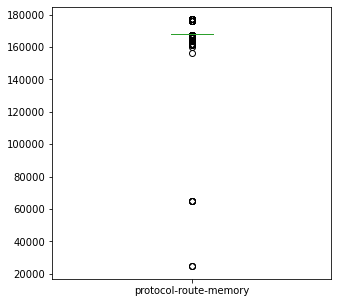

In [12]:
plt.figure(figsize = (5,5))
leaf1_vis['protocol-route-memory'].plot(kind = 'box')
plt.show()

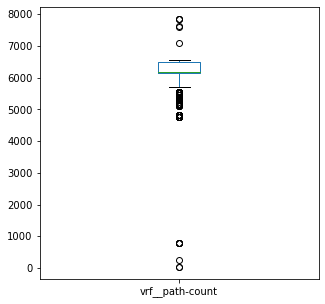

In [13]:
plt.figure(figsize = (5,5))
leaf1_vis['vrf__path-count'].plot(kind = 'box')
plt.show()

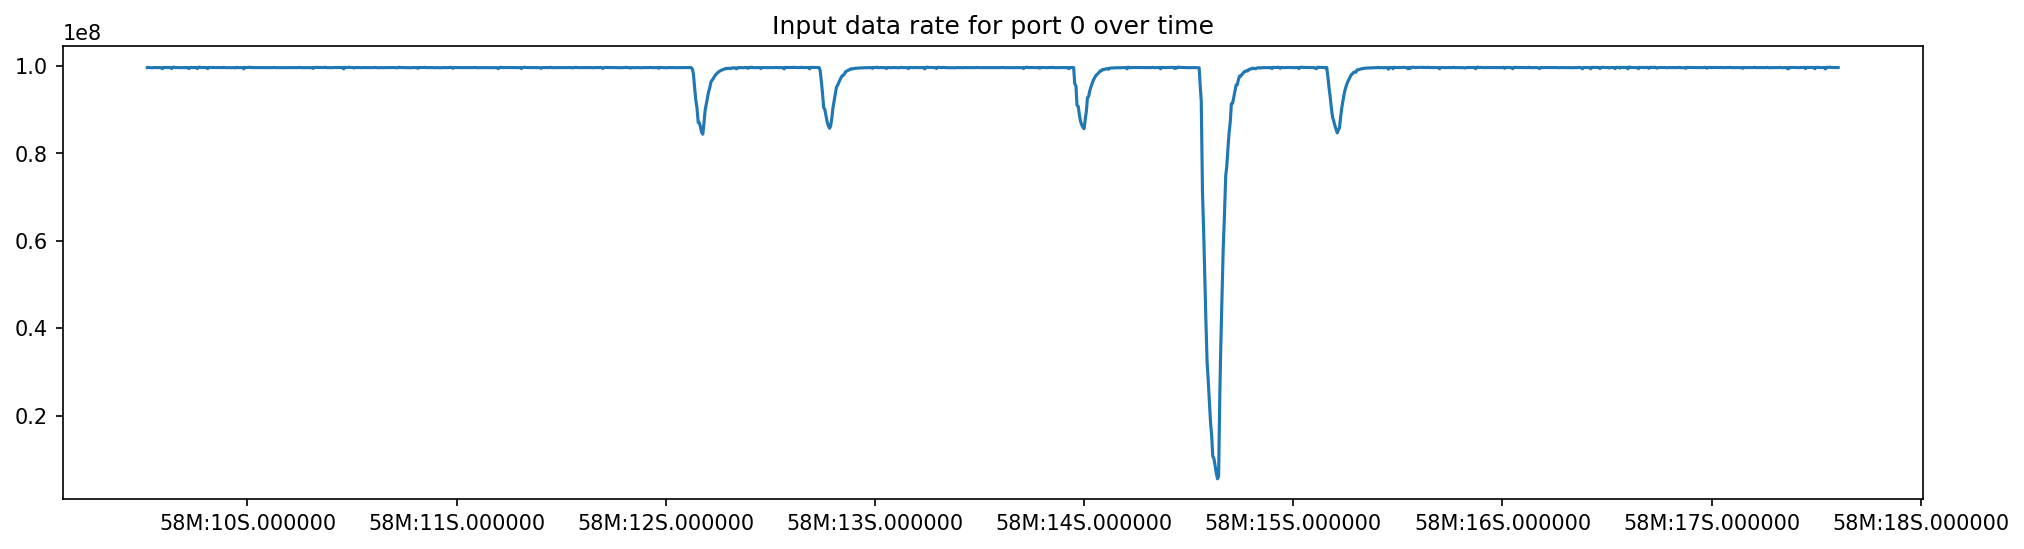

In [14]:
 # Visualuazation of input data rate on one of the port
plt.rcParams['figure.dpi'] = 150
f,ax = plt.subplots(figsize=(16,4))
xfmt = mdates.DateFormatter('%MM:%SS.%f')
ax.xaxis.set_major_formatter(xfmt)
ax.plot(leaf1_vis.index,leaf1_vis['HundredGigE0/0/0/0input-data-rate'])
ax.set_title('Input data rate for port 0 over time')
plt.show()


*from above charts we can see there is a huge drop in input data rate , which could possibly be an anomaly
also similarly we can see deviation from normal behaviour which can be due to possible anomaly*

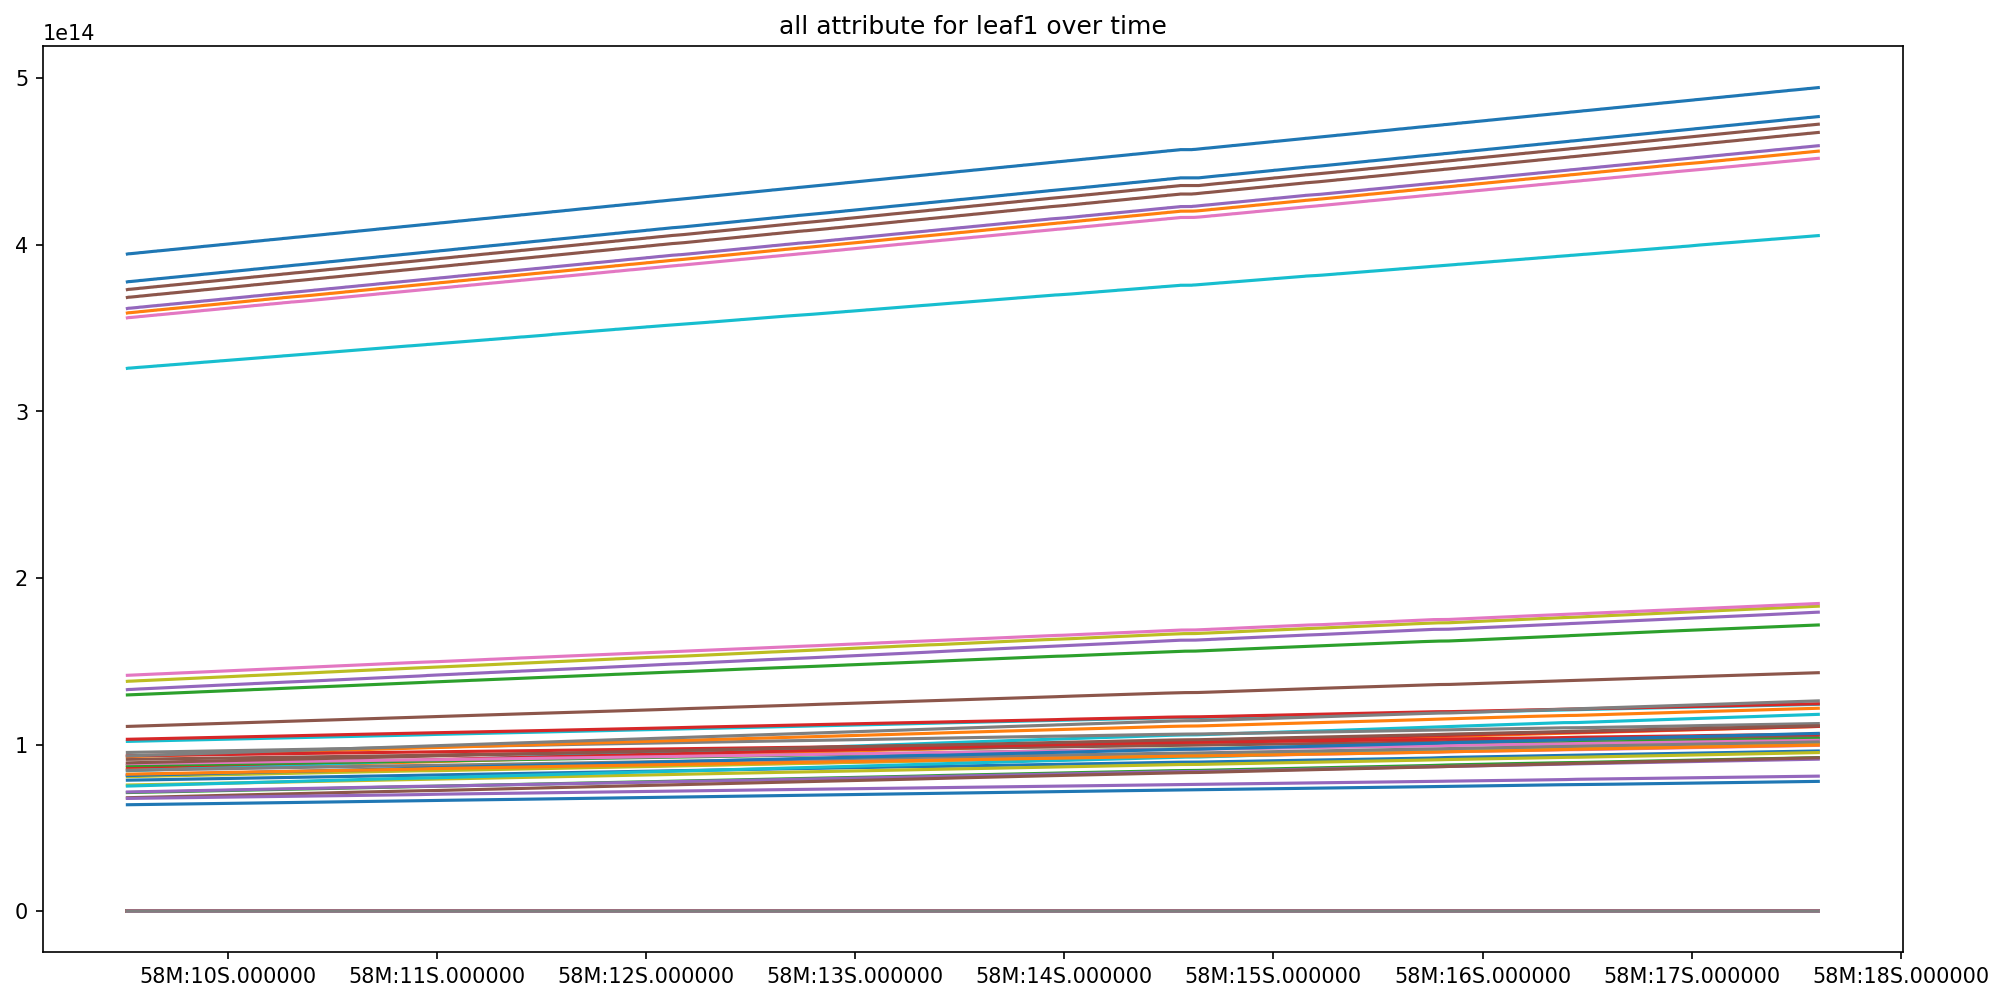

In [15]:
plt.rcParams['figure.dpi'] = 150
f,ax = plt.subplots(figsize=(16, 8))
xfmt = mdates.DateFormatter('%MM:%SS.%f')
ax.xaxis.set_major_formatter(xfmt)
ax.plot(leaf1_vis.index,leaf1_vis)
ax.set_title('all attribute for leaf1 over time')
plt.show()


*From above graph we can see that all the data columns are of different scale and there is a need to do normalization*

In [16]:
#creating new dataframe based on feature list for dataplane 
featureList=['active-routes-count','backup-routes-count','deleted-routes-count','paths-count', 'protocol-route-memory', 'global__established-neighbors-count-total', 'performance-statistics__global__configuration-items-processed', 'performance-statistics__vrf__inbound-update-messages', 'vrf__path-count', 'vrf__update-messages-received']
leaf1_dp=leaf1_new[featureList]


# Univariate Visualization

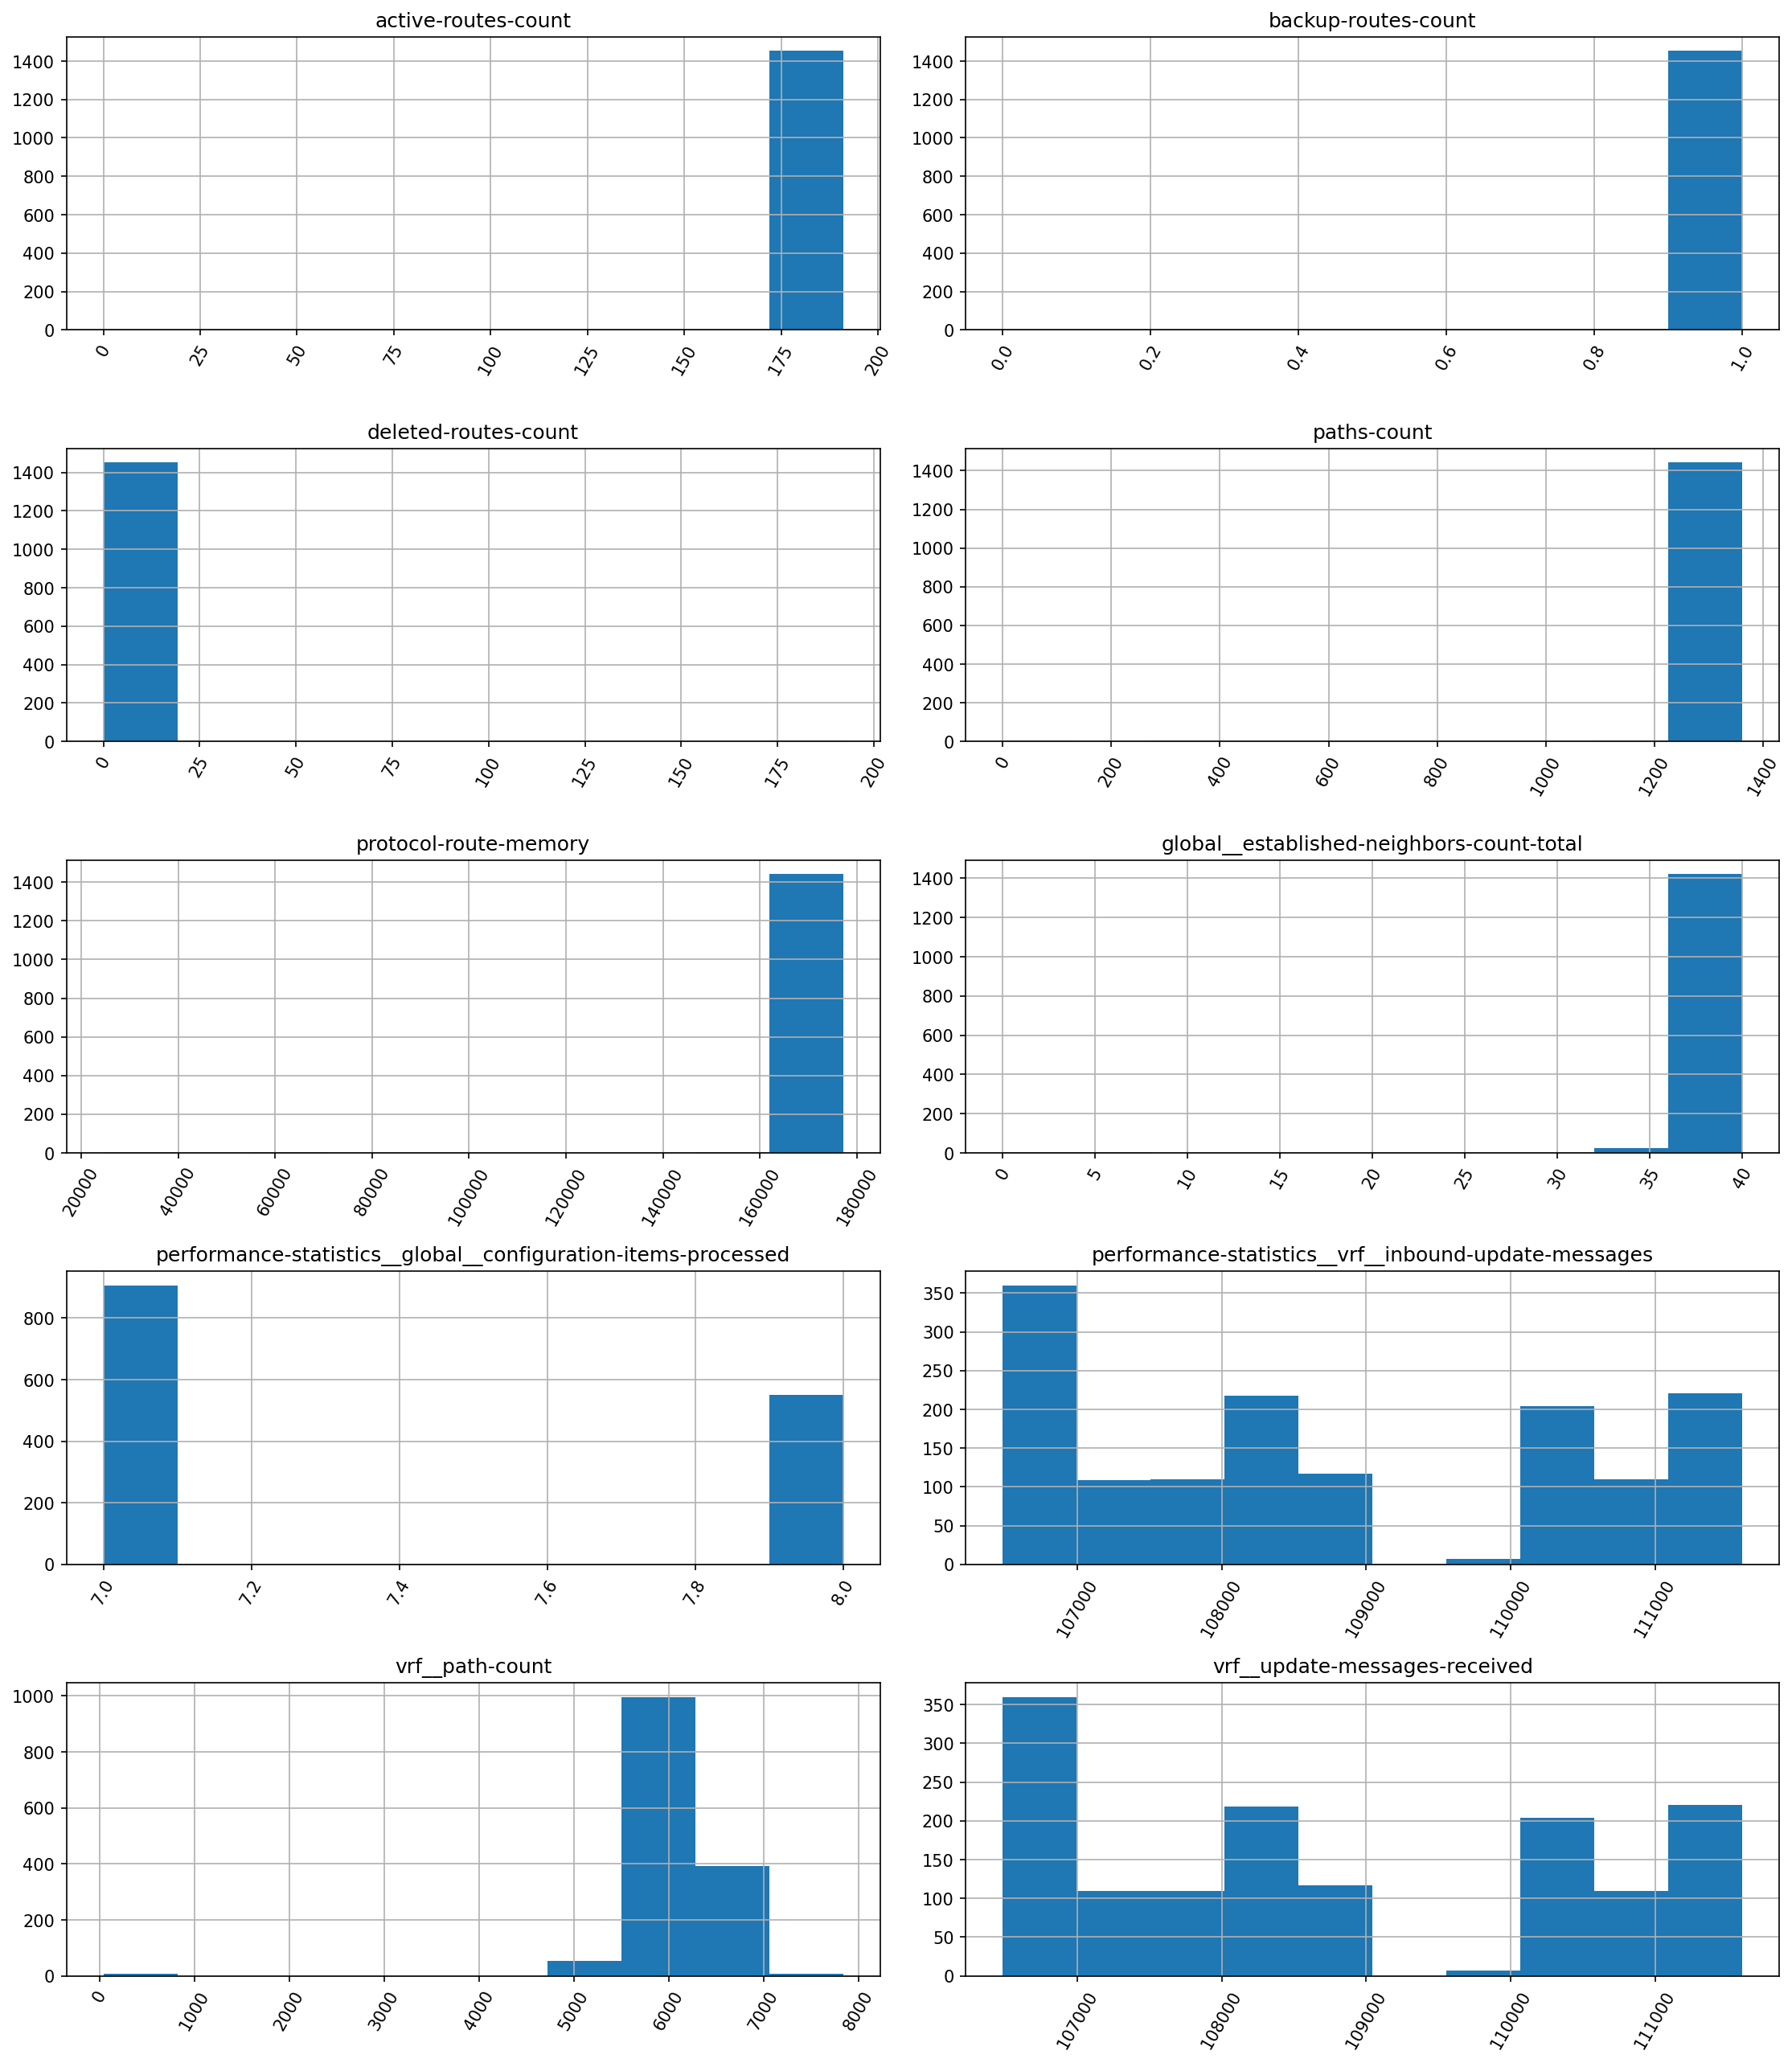

In [17]:
leaf1_dp.hist(figsize=(15, 20),xrot=60,layout=(6,2))
#plt.hist(leaf1_dp)
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

In [18]:
#get info of dataframe
leaf1_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 10 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   active-routes-count                                            1456 non-null   float64
 1   backup-routes-count                                            1456 non-null   float64
 2   deleted-routes-count                                           1456 non-null   float64
 3   paths-count                                                    1456 non-null   float64
 4   protocol-route-memory                                          1456 non-null   float64
 5   global__established-neighbors-count-total                      1456 non-null   float64
 6   performance-statistics__global__configuration-items-processed  1456 non-null   float64
 7   performance-statistics__vrf__inbound-update-messages        

# Normalization of Data

In [19]:
scaler= MinMaxScaler()
ss = StandardScaler()

In [20]:
#df=pd.DataFrame(leaf1_new.describe())
#df.to_csv('data_info.csv', index=True)

In [21]:
leaf1_new_normalized =scaler.fit_transform(leaf1_dp)
#ff_dp_normalized =ss.fit_transform(ff_dp)
leaf1_new_normalized

array([[1.        , 1.        , 0.        , ..., 0.        , 0.78216806,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.78216806,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.78216806,
        0.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 1.        , 0.77075048,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.77075048,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.77075048,
        1.        ]])

# Model Building and Evaluation

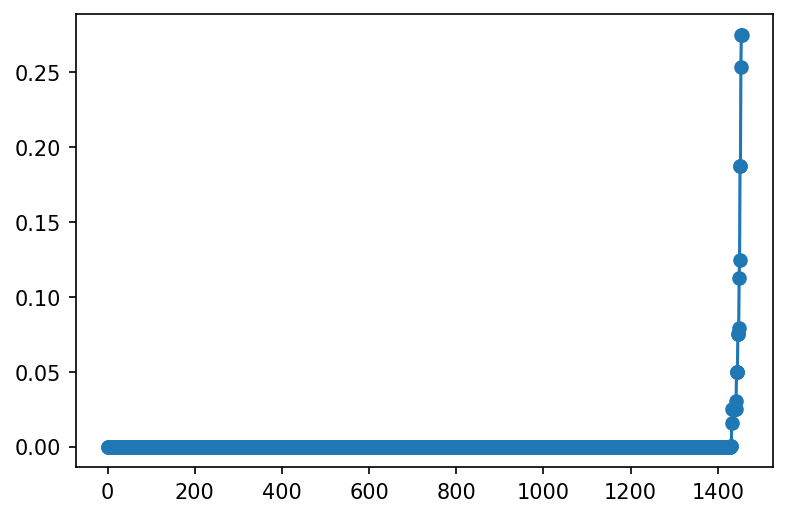

In [22]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(leaf1_new_normalized)
distances, indices = nbrs.kneighbors(leaf1_new_normalized)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances,marker='o')
plt.show()

In [23]:
db = DBSCAN(eps=0.025, min_samples=8)
model=db.fit(leaf1_new_normalized)
y_pred=model.fit_predict(leaf1_new_normalized)
lables=model.labels_
lables

array([ 0,  0,  0, ..., 18, 18, 18], dtype=int64)

In [24]:
leaf1_new_normalized[1]
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 68,
 0: 141,
 1: 11,
 2: 98,
 3: 100,
 4: 11,
 5: 98,
 6: 99,
 7: 10,
 8: 99,
 9: 100,
 10: 11,
 11: 98,
 12: 95,
 13: 11,
 14: 98,
 15: 99,
 16: 100,
 17: 8,
 18: 101}

In [25]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(leaf1_new_normalized, labels))

Estimated number of clusters: 19
Estimated number of noise points: 68
Silhouette Coefficient: 0.910


In [26]:
#plt.scatter(ff_dp[:,0], ff_dp[:,1],c=y_pred, cmap='Paired', s=20)
labels_df = pd.DataFrame(model.labels_)
labelled_leaf1_new= pd.concat((leaf1_dp,labels_df),axis=1)
labelled_leaf1_new=labelled_leaf1_new.rename({0:'label'},axis=1)
#labelled_ff_dp.std()

In [27]:
labelled_leaf1_new.groupby('label').mean().reset_index()

,label,active-routes-count,backup-routes-count,deleted-routes-count,paths-count,protocol-route-memory,global__established-neighbors-count-total,performance-statistics__global__configuration-items-processed,performance-statistics__vrf__inbound-update-messages,vrf__path-count,vrf__update-messages-received
0,-1,182.441176,0.955882,8.602941,1192.191176,158101.411765,33.220588,7.558824,109105.838235,4869.397059,109105.838235
1,0,191.000000,1.000000,0.000000,1282.000000,168160.000000,40.000000,7.000000,106484.000000,6140.000000,106484.000000
2,1,190.727273,1.000000,0.272727,1263.727273,166113.454545,40.000000,7.000000,106707.545455,5552.636364,106707.545455
3,2,191.000000,1.000000,0.000000,1282.000000,168160.000000,40.000000,7.000000,106764.000000,6129.000000,106764.000000
4,3,191.000000,1.000000,0.000000,1282.000000,168160.000000,40.000000,7.000000,106974.620000,6166.920000,106974.620000
5,4,190.454545,1.000000,0.545455,1244.909091,164005.818182,40.000000,7.000000,107270.909091,5512.181818,107270.909091
6,5,191.000000,1.000000,0.000000,1282.000000,168160.000000,40.000000,7.000000,107377.000000,6165.000000,107377.000000
7,6,191.000000,1.000000,0.000000,1282.000000,168160.000000,40.000000,7.000000,107740.000000,6177.000000,107740.000000
8,7,191.000000,1.000000,0.000000,1271.500000,166984.000000,40.000000,7.000000,108058.500000,5789.500000,108058.500000
9,8,191.000000,1.000000,0.000000,1282.000000,168160.000000,40.000000,7.000000,108268.030303,6172.000000,108268.030303


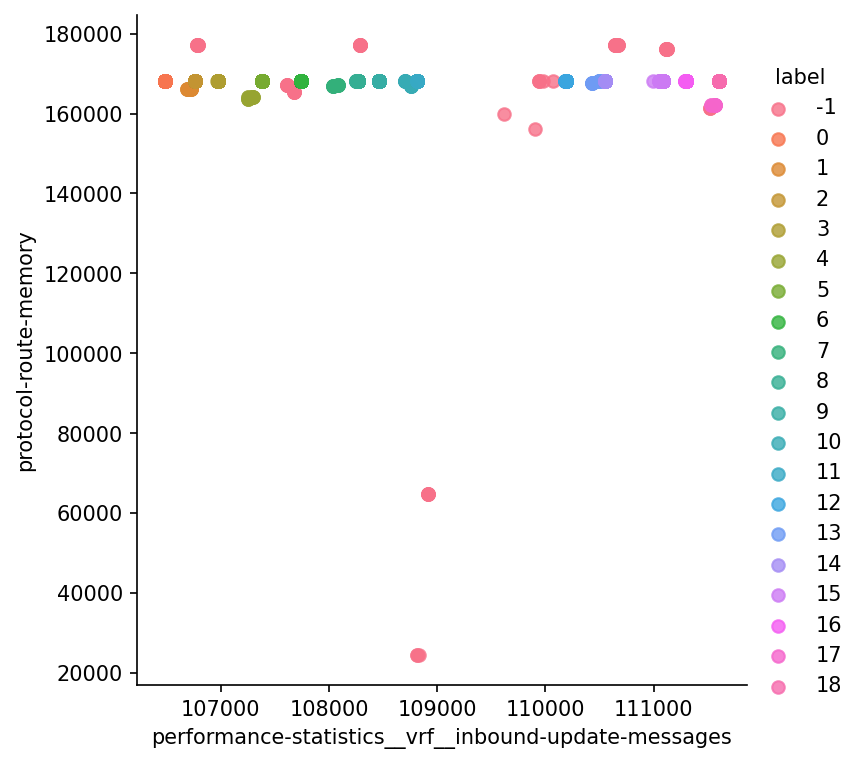

In [28]:
sns.lmplot(x='performance-statistics__vrf__inbound-update-messages',y='protocol-route-memory',data=labelled_leaf1_new,hue='label',fit_reg=False)

In [29]:
labelled_leaf1_new

,active-routes-count,backup-routes-count,deleted-routes-count,paths-count,protocol-route-memory,global__established-neighbors-count-total,performance-statistics__global__configuration-items-processed,performance-statistics__vrf__inbound-update-messages,vrf__path-count,vrf__update-messages-received,label
0,191.0,1.0,0.0,1282.0,168160.0,40.0,7.0,106484.0,6140.0,106484.0,0
1,191.0,1.0,0.0,1282.0,168160.0,40.0,7.0,106484.0,6140.0,106484.0,0
2,191.0,1.0,0.0,1282.0,168160.0,40.0,7.0,106484.0,6140.0,106484.0,0
3,191.0,1.0,0.0,1282.0,168160.0,40.0,7.0,106484.0,6140.0,106484.0,0
4,191.0,1.0,0.0,1282.0,168160.0,40.0,7.0,106484.0,6140.0,106484.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1451,191.0,1.0,0.0,1282.0,168160.0,40.0,8.0,111604.0,6051.0,111604.0,18
1452,191.0,1.0,0.0,1282.0,168160.0,40.0,8.0,111604.0,6051.0,111604.0,18
1453,191.0,1.0,0.0,1282.0,168160.0,40.0,8.0,111604.0,6051.0,111604.0,18
1454,191.0,1.0,0.0,1282.0,168160.0,40.0,8.0,111604.0,6051.0,111604.0,18


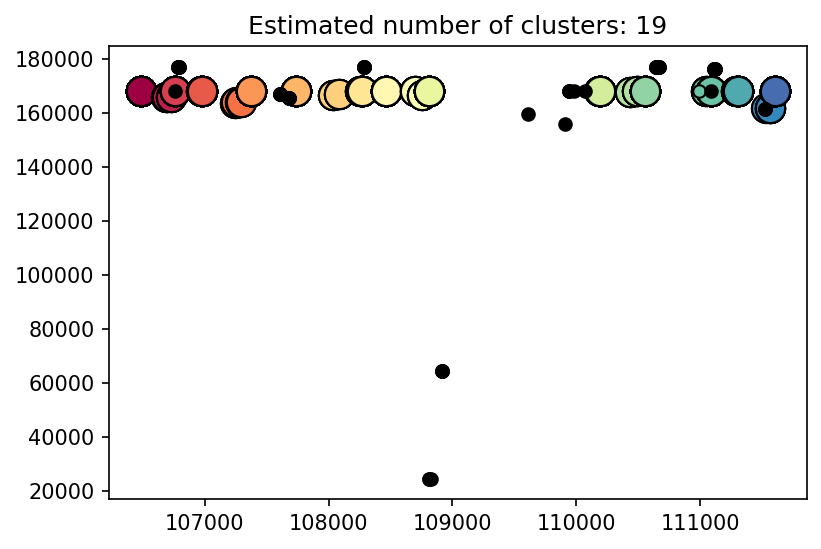

In [30]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
#print(unique_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    #print(class_member_mask)
    #print(core_samples_mask)
    xy = leaf1_new[class_member_mask & core_samples_mask]
    #print(xy)
    #print(xy[:, 1])
    plt.plot(xy['performance-statistics__vrf__inbound-update-messages'],xy['protocol-route-memory'], 'o', markerfacecolor=tuple(col),
           markeredgecolor='k', markersize=14)

    xy = leaf1_new[class_member_mask & ~core_samples_mask]
    plt.plot(xy['performance-statistics__vrf__inbound-update-messages'],xy['protocol-route-memory'], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

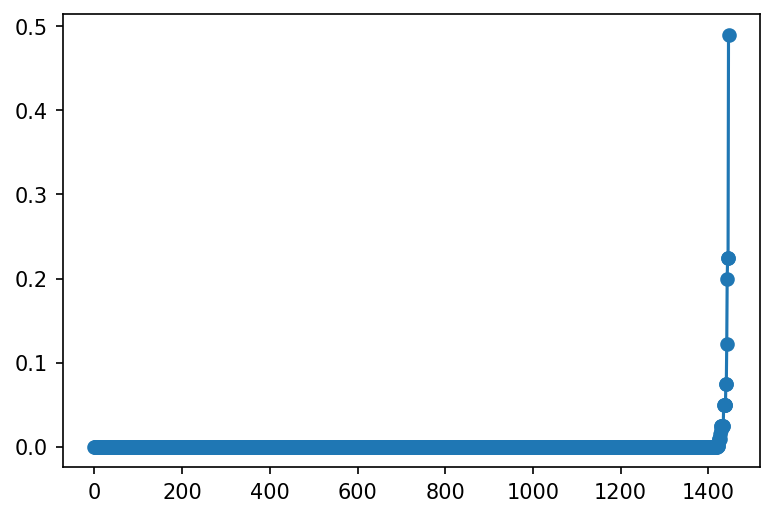

In [79]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(leaf2_new_normalized)
distances, indices = nbrs.kneighbors(leaf2_new_normalized)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances,marker='o')
plt.show()

In [80]:
db = DBSCAN(eps=0.025, min_samples=8)
model=db.fit(leaf2_new_normalized)
y_pred=model.fit_predict(leaf2_new_normalized)
lables=model.labels_
lables

array([ 0,  0,  0, ..., 15, 15, 15], dtype=int64)

In [81]:
leaf2_new_normalized[1]
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 57,
 0: 141,
 1: 108,
 2: 99,
 3: 8,
 4: 98,
 5: 108,
 6: 11,
 7: 98,
 8: 100,
 9: 108,
 10: 11,
 11: 98,
 12: 108,
 13: 99,
 14: 98,
 15: 97}

Isolation Forest, a method which in principle is similar to the well-known and popular Random Forest. It identifies outliers in a multidimensional space.The main idea, which is different from other popular outlier detection methods, is that Isolation Forest explicitly identifies anomalies instead of profiling normal data points.It is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.

In [82]:
from sklearn.ensemble import IsolationForest

In [83]:
imodel =IsolationForest(contamination=0.10,n_estimators=100)

In [84]:
%%time
imodel.fit(leaf1_new_normalized)

Wall time: 256 ms


IsolationForest(contamination=0.1)

In [85]:
y_pred_outliers =imodel.predict(leaf1_new_normalized)

In [86]:
leaf1_dp['iforest']=pd.Series(y_pred_outliers)
leaf1_dp['iforest'].value_counts()

<ipython-input-86-d2a1c091fba1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaf1_dp['iforest']=pd.Series(y_pred_outliers)


 1    1315
-1     141
Name: iforest, dtype: int64

In [87]:
leaf1_anomalies=leaf1_dp.loc[leaf1_dp['iforest']==-1]
leaf1_normal=leaf1_dp.loc[leaf1_dp['iforest']==1]

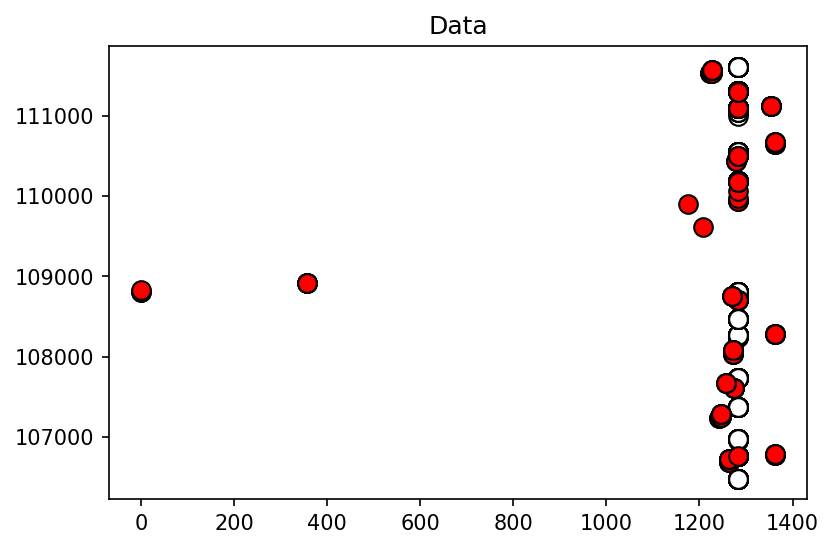

In [88]:
leaf1_normal

plt.title("Data")

p1 = plt.scatter(leaf1_normal['paths-count'], leaf1_normal['vrf__update-messages-received'], c='white',
                 s=20*4, edgecolor='k')

p3 = plt.scatter(leaf1_anomalies['paths-count'], leaf1_anomalies['vrf__update-messages-received'], c='red',
                s=20*4, edgecolor='k')

In [89]:
from readGroundTruth import groundTruth

In [90]:
truth = groundTruth(r"..\Dissertation\GroundTruth\bgpclear_apptraffic_2hourRun.txt", fileType='csv')

In [91]:
for eventNumber in range(len(truth.events)):

        event = truth.events[eventNumber]
        clear = truth.clears[eventNumber]
        print(event)
        print(clear)

{'name': 0, 'startTime': 1519094546, 'endTime': 1519094846, 'node': 'leaf1', 'type': 'single', 'ONLINE': False, 'endSent': False}
{'name': 'clear0', 'startTime': 1519094847, 'endTime': 1519095147}


In [144]:
leaf2=pd.read_csv(r"..\Dissertation\Data\spine4bgpclear_apptraffic_2hourRun.csv"\
               ).dropna().drop('Unnamed: 0', axis=1)

In [145]:
leaf2_dp=leaf2[featureList]

In [146]:
leaf2_new_normalized =scaler.fit_transform(leaf2_dp)
#ff_dp_normalized =ss.fit_transform(ff_dp)
leaf2_new_normalized

array([[1.        , 0.        , 0.        , ..., 0.        , 0.87506836,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.87506836,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.87506836,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.87506836,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.87506836,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.87506836,
        1.        ]])

In [147]:
rng = np.random.RandomState(42)

imodel2 =IsolationForest(contamination='auto',max_samples='auto',n_estimators=100,random_state=rng)
%time
imodel2.fit(leaf2_new_normalized)

Wall time: 0 ns


IsolationForest(random_state=RandomState(MT19937) at 0x26494387040)

In [148]:
y_pred_outliers =imodel2.predict(leaf2_new_normalized)

In [149]:
leaf2_dp['iforest']=pd.Series(y_pred_outliers)
leaf2_dp['iforest'].value_counts()

<ipython-input-149-92c261da7914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaf2_dp['iforest']=pd.Series(y_pred_outliers)


 1    1323
-1     114
Name: iforest, dtype: int64

In [143]:
leaf2_anomalies=leaf2_dp.loc[leaf1_dp['iforest']==-1]
leaf2_normal=leaf2_dp.loc[leaf1_dp['iforest']==1]

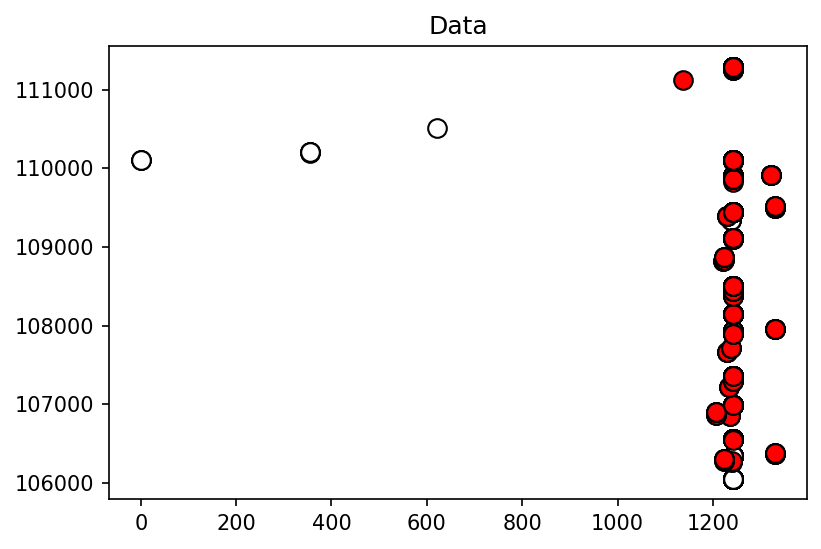

In [52]:
plt.title("Data")

p1 = plt.scatter(leaf2_normal['paths-count'], leaf2_normal['vrf__update-messages-received'], c='white',
                 s=20*4, edgecolor='k')

p3 = plt.scatter(leaf2_anomalies['paths-count'], leaf2_anomalies['vrf__update-messages-received'], c='red',
                s=20*4, edgecolor='k')